<a href="https://colab.research.google.com/github/Permanganant/EHB-420E---Artificial-Neural-Networks-/blob/main/Art_Movement_Identification_with_Convolutional_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Art Movement Identification with Convolutional Neural Networks 

*   List item
*   List item



Mert Alperen Beser

[Colab Link](https://colab.research.google.com/drive/1WEC_aAjMTq0ETJqV085moD1CO-KQffT3?usp=sharing)
----





 
 ### Aim of the Project : 

It is known that there are several art styles and movements that
occurred throughout history. Painting is the first art genre that is coming to our
minds. However, it is hard to recognize which art style was used for one looked
painting without being an art expert or enthusiast. This project aims to make a
system that classifies painting art style for everyone who doesn’t understand
any art style, new learners, children, or experts that wants to challenge
themselves.

---

### Dataset: 
[Wiki Art](https://https://www.wikiart.org/en/about) is the non profit project that aims to make art accessible to everyone. It works with the wiki principle. It contains approximately 250.000 artworks by 3.000 artists, localized on 8 languages. There are dozens of [art movements ](https://www.wikiart.org/en/artists-by-art-movement) that is grouped by art historians in the dataset. In the dataset that will be downloaded below, there are 27 art movement classes that are highly satisfying for our project. Yet, in this project, only 10 of them will be used to speed up the training time.

---

## 1- Importing required libraries 

In [ ]:
import os
import shutil
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten,Lambda
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import losses

from tensorflow.keras.utils import to_categorical 

In [ ]:
import tensorflow as tf

## 2- Download Wiki-Art data set


[Wiki-Art Data Set Zip File](https://archive.org/download/wikiart-dataset/wikiart.tar.gz)

In [ ]:
import requests 
file_url = "https://archive.org/download/wikiart-dataset/wikiart.tar.gz"
	
r = requests.get(file_url, stream = True) 

with open("/content/drive/MyDrive/wiki_art/wikiart.tar.gz", "wb") as file: 
	for block in r.iter_content(chunk_size = 1024): 
		if block: 
			file.write(block) 

Unzipping the tar.gz file to the Google Drive

In [ ]:
!tar -xvf "/content/drive/MyDrive/wiki_art/wikiart.tar.gz" -C "/content/drive/MyDrive/wiki_art/data"    

## 3 - Data Loading and Preprocessing

*  The dataset that is downloaded above is nearly about 30Gb. This size of data 
requires too much computation power even for high-performance GPUs. However, it is not possible to train 30GB of data just with the Colab's GPU and TPU(It is possible but it will take a huge amount of time). Normally, images are assigned and categorized as NumPy array, yet it is not possible and efficient to assign and save 30GB data as NumPy array with just 12GB Ram in Colab Environment. The efficient way to call data is by saving the file names and putting them into an array then summoning the images from the directory(in this case from Google Drive). In addition, some of the classes which have fewer images compared to others were eliminated manually to speed up the process. Also, the remaining classes are limited with sizes for minimizing the dataset again. It can be tried without any elimination if one does want to wait days to train a model or one has enormous computing power, it is up to the user.



*  The table below shows the original data sizes
*  Blue marked classes were removed
*  Red marked classes were chosen for the training



*The 27 classes, 20 classes, and  10 classes version of the dataset were trained. However, the training time was too immense and 6 classes were chosen finally to train.*

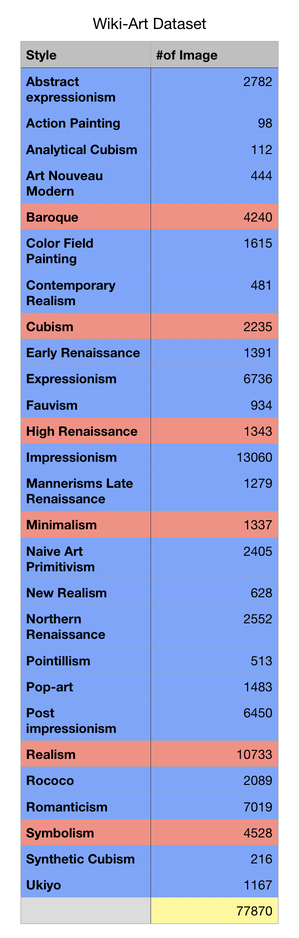

In [ ]:
train_dir = "/content/drive/MyDrive/wiki_art/data/wikiart_6"
dest_dir = "/content/drive/MyDrive/wiki_art/data/images_6"

Total number of images in our dataset

In [ ]:
counter = 0
for subdir, dirs, files in os.walk(train_dir):
  for i in files:
    counter+=1
counter

24416

List of Classes

In [ ]:
for item in os.listdir(train_dir):
  print(item)

Baroque
Minimalism
Symbolism
Realism
High_Renaissance
Cubism


This part copies the images from all classes into one folder in order. Normally, all files can be copied in a for loop, however; Colab gives Input/Output File Error while trying to write multiple files at one time by reason of this the "class" parameter was defined into the for loop to manually copy files from each class. "classes" takes integers 1 to 27(in this case 1 to 6) for each class. The names of the images are changed while uploading to the images folder the reason that is there might be overlapping images that belong to multiple classes, if there is an overlap "shutil.copy" function saves the same images as one image and this will cause data loss.

In [ ]:
counter = 1

In [ ]:
s = 0
for subdir, dirs, files in os.walk(train_dir):
  if s == 6:
    print(subdir)
    for file in files:
        #Saving pictures with number names
        new_path = os.path.join(dest_dir,str(counter)+'.jpg')
        full_path = os.path.join(subdir, file)

        #Copying all the images into the new folder
        #shutil.copy(full_path, new_path)
        counter = counter + 1
  s = s + 1
print(counter-1)

/content/drive/MyDrive/wiki_art/data/wikiart_6/Cubism
24416


Total number of images

In [ ]:
subdirs, dirs, files = os.walk(dest_dir).__next__()
m = len(files)
m

24416

In [ ]:
m

24416

This part below creates both label array and filenames array to be saved as NumPy. File names will be used to get data from directory. 

In [ ]:
filenames = []
labels = np.zeros((m, 1))

train_dir = '/content/drive/MyDrive/wiki_art/data/wikiart_6'

filenames_counter = 0
labels_counter = -1

for subdir, dirs, files in os.walk(train_dir):
    print(subdir)
    for file in files:
          filenames.append(str(filenames_counter+1)+'.jpg')
          labels[filenames_counter, 0] = labels_counter
          filenames_counter = filenames_counter + 1
    labels_counter = labels_counter+1
    
print(len(filenames))
print(labels.shape)

X = filenames

/content/drive/MyDrive/wiki_art/data/wikiart_6
/content/drive/MyDrive/wiki_art/data/wikiart_6/Baroque
/content/drive/MyDrive/wiki_art/data/wikiart_6/Minimalism
/content/drive/MyDrive/wiki_art/data/wikiart_6/Symbolism
/content/drive/MyDrive/wiki_art/data/wikiart_6/Realism
/content/drive/MyDrive/wiki_art/data/wikiart_6/High_Renaissance
/content/drive/MyDrive/wiki_art/data/wikiart_6/Cubism
24416
(24416, 1)


In [ ]:
# Saving categorized filename NumPy array
np.save('/content/drive/MyDrive/wiki_art/6/X.npy', X)

# Categorizing the labels
Y= to_categorical(labels)

# Saving categorized label NumPy array
np.save('/content/drive/MyDrive/wiki_art/6/Y.npy', Y)

Shuffling the data for training

In [ ]:
from sklearn.utils import shuffle
X_shuffled, Y_shuffled = shuffle(X, Y)

In [ ]:
np.save('/content/drive/MyDrive/wiki_art/6/y_labels_shuffled.npy', Y_shuffled)
np.save('/content/drive/MyDrive/wiki_art/6/filenames_shuffled.npy', X_shuffled)

In [ ]:
#Converting X_shuffled into NumPy array
X_shuffled_numpy = np.array(X_shuffled)

This part splits the dataset into training, validation, and test dataset with %80,%10, and %10 percent respectively.

In [ ]:
from sklearn.model_selection import train_test_split

#Assigining the ratios
train_ratio = 0.9
validation_ratio = 0.05
test_ratio = 0.05

#Splitting part
X_train_filenames, X_test_filenames, y_train, y_test = train_test_split(X_shuffled_numpy, Y_shuffled, test_size=1 - train_ratio,)
X_val_filenames, X_test_filenames, y_val, y_test = train_test_split(X_test_filenames, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

Shapes of the train, validation and test sets

In [ ]:
print("Train Shapes")
print(X_train_filenames.shape) 
print(y_train.shape)           

print("Validation Shapes")
print(X_val_filenames.shape)   
print(y_val.shape)             

print("Test Shapes")
print(X_test_filenames.shape)   
print(y_test.shape)           

Train Shapes
(21974,)
(21974, 6)
Validation Shapes
(1221,)
(1221, 6)
Test Shapes
(1221,)
(1221, 6)


Saving splitted data

In [ ]:
np.save('/content/drive/MyDrive/wiki_art/6/X_train.npy', X_train_filenames)
np.save('/content/drive/MyDrive/wiki_art/6/y_train.npy', y_train)

np.save('/content/drive/MyDrive/wiki_art/6/X_val.npy', X_val_filenames)
np.save('/content/drive/MyDrive/wiki_art/6/y_val.npy', y_val)


np.save('/content/drive/MyDrive/wiki_art/6/X_test.npy', X_test_filenames)
np.save('/content/drive/MyDrive/wiki_art/6/y_test.npy', y_test)

## 4 - Loading Shuffled Data

In [ ]:
X_train_filenames = np.load('/content/drive/MyDrive/wiki_art/6/X_train.npy')
y_train = np.load('/content/drive/MyDrive/wiki_art/6/y_train.npy')

X_val_filenames = np.load('/content/drive/MyDrive/wiki_art/6/X_val.npy')
y_val = np.load('/content/drive/MyDrive/wiki_art/6/y_val.npy')


X_test_filenames = np.load('/content/drive/MyDrive/wiki_art/6/X_test.npy')
y_test = np.load('/content/drive/MyDrive/wiki_art/6/y_test.npy')

### Visualizing the data

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import time
from PIL import Image

In [ ]:
class_name = []
for item in os.listdir(train_dir):
  class_name.append(item)

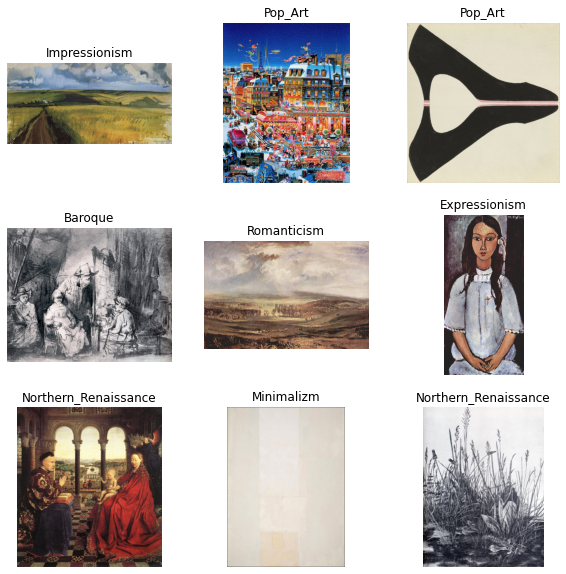

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for image in X_train_filenames[0:9]:
  img =  mpimg.imread("/content/drive/MyDrive/wiki_art/data/images/"+image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.astype("uint8"))
  index = (np.argwhere(y_train[i] == 1))[0][0]
  plt.title(class_name[index])
  plt.axis("off")
  i += 1

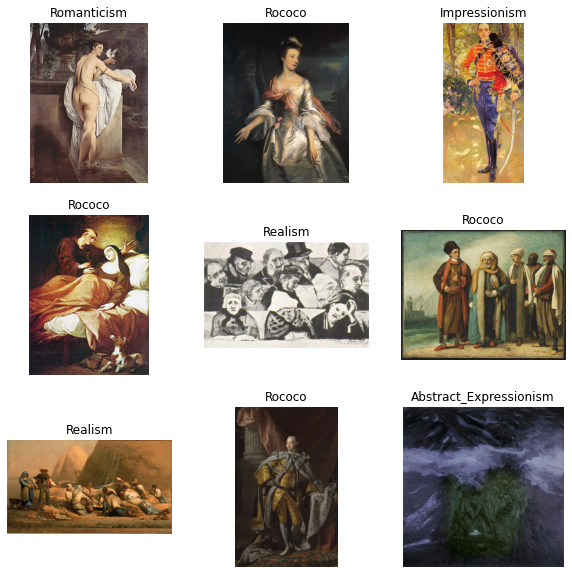

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for image in X_val_filenames[0:9]:
  img =  mpimg.imread("/content/drive/MyDrive/wiki_art/data/images/"+image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.astype("uint8"))
  index = (np.argwhere(y_val[i] == 1))[0][0]
  plt.title(class_name[index])
  plt.axis("off")
  i += 1

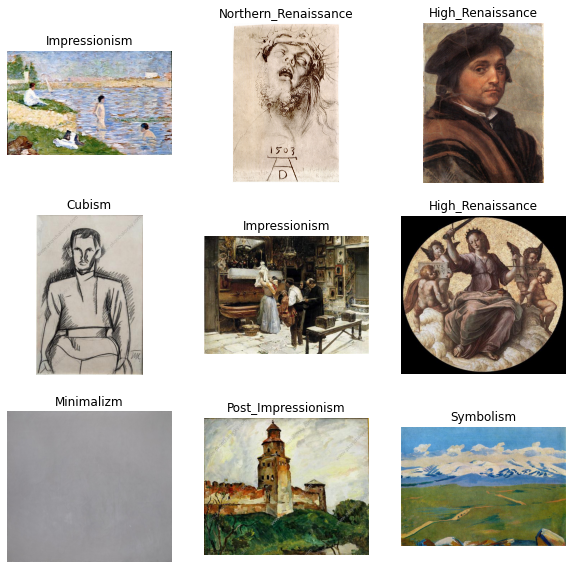

In [ ]:
plt.figure(figsize=(10, 10))
i = 0
for image in X_test_filenames[0:9]:
  img =  mpimg.imread("/content/drive/MyDrive/wiki_art/data/images/"+image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img.astype("uint8"))
  index = (np.argwhere(y_test[i] == 1))[0][0]
  plt.title(class_name[index])
  plt.axis("off")
  i += 1

## 5 - Creating a Generator

This generator function below is for calling the files from its name by using NumPy arrays created before and seperate into the batches. 

In [ ]:
class My_Custom_Generator(tf.keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

    #Calling the images from directory and resize into 224px-224px RGB images
    return np.array([
            resize(imread('/content/drive/MyDrive/wiki_art/data/images_6/' + str(file_name)), (224, 224, 3))
               for file_name in batch_x])/255.0, np.array(batch_y)

In [ ]:
batch_size = 64

my_training_batch_generator = My_Custom_Generator(X_train_filenames, y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val_filenames, y_val, batch_size)
my_test_batch_generator = My_Custom_Generator(X_test_filenames, y_test, batch_size)

## 6 - Training

### I) Custom CNN Model




In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,GlobalAveragePooling2D

In [ ]:
filepath_custom = "/content/drive/MyDrive/wiki_art/Custom_CNN"

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu',input_shape=(224,224,3)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (5,5), activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation = "softmax")) #Classification layer 

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_406 (Conv2D)         (None, 220, 220, 64)      4864      
                                                                 
 batch_normalization_406 (Ba  (None, 220, 220, 64)     256       
 tchNormalization)                                               
                                                                 
 conv2d_407 (Conv2D)         (None, 216, 216, 64)      102464    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 108, 108, 64)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 108, 108, 64)      0         
                                                                 
 conv2d_408 (Conv2D)         (None, 104, 104, 128)     2

Model structure

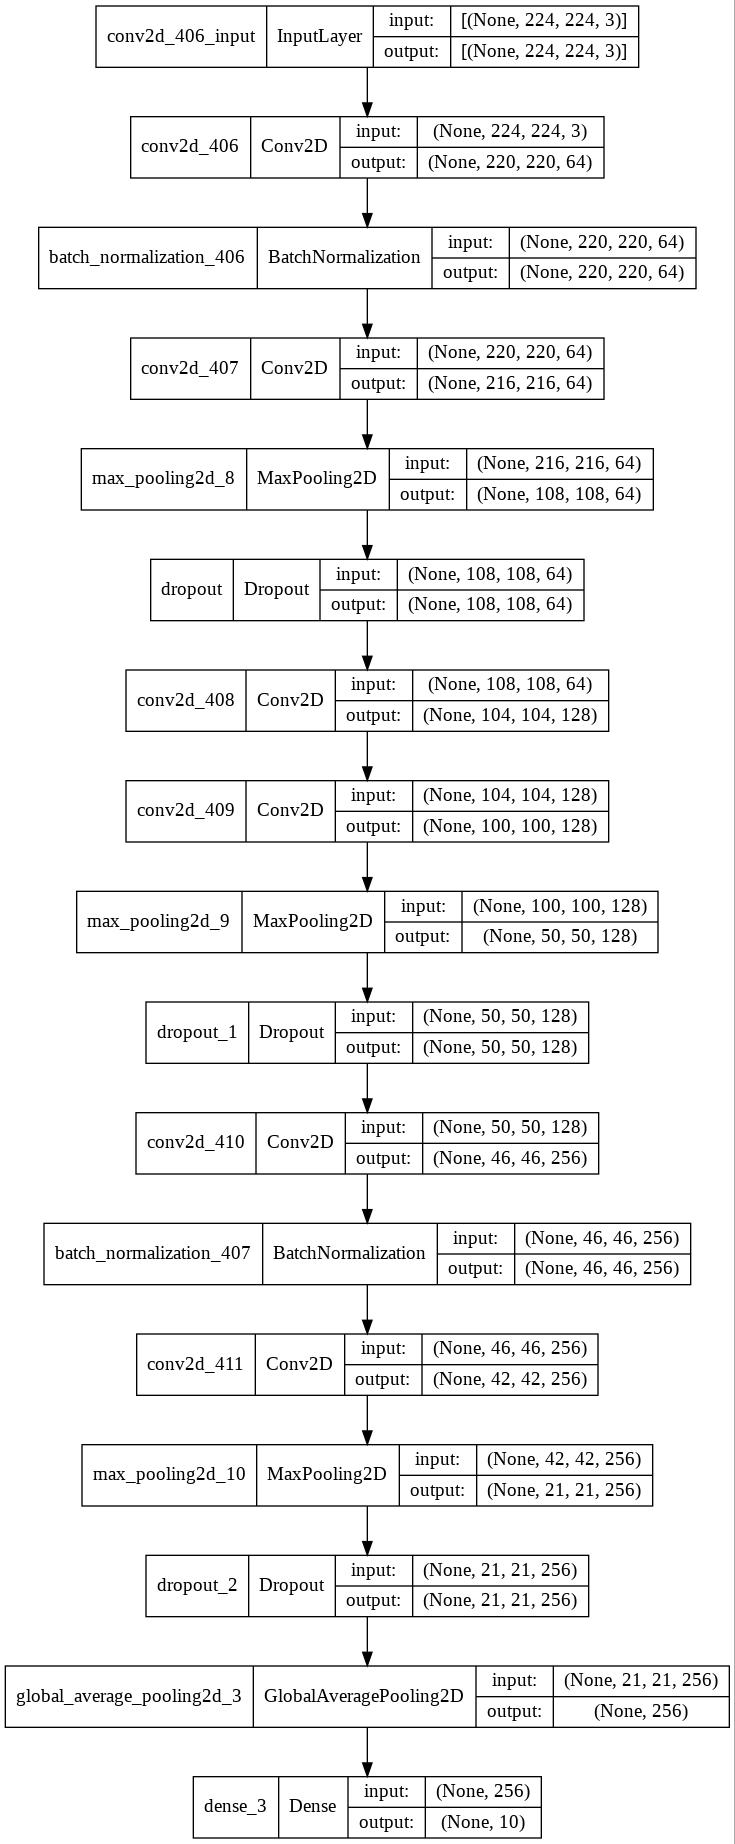

In [ ]:
dot_img_file = filepath_custom+'/structure.jpg'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle

In [ ]:
# load the model
model = load_model(filepath_custom)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# define the checkpoint
checkpoint = ModelCheckpoint(filepath_custom+'/checkpoints.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
# fit the model
epochs = 10
history = model.fit(my_training_batch_generator,
                   steps_per_epoch = int(31629 // (batch_size)),
                   epochs = 10, 
                   verbose = 1, 
                   validation_data = my_validation_batch_generator,
                   validation_steps = int(3954 // (batch_size)),
                   callbacks=callbacks_list)

In [ ]:
def save_history(filename,a):
  try:
      array = np.load(filename)
      array = np.append(array,a)
      np.save(filename,array)
      print("Appended")
  except:
      np.save(filename,array)
      print("Saved")

In [ ]:
acc = np.array(history.history['accuracy'])
save_history(filepath_custom+'/accuracy.npy',acc)

loss = np.array(history.history['loss'])
save_history(filepath_custom+'/loss.npy',loss)

val_acc = np.array(history.history['val_accuracy'])
save_history(filepath_custom+'/val_accuracy.npy',val_acc)

val_loss = np.array(history.history['val_loss'])
save_history(filepath_custom+'/val_loss.npy',val_loss)

In [ ]:
acc = np.load(filepath_custom+'/accuracy.npy')
loss = np.load(filepath_custom+'/loss.npy')
val_acc = np.load(filepath_custom+'/val_accuracy.npy')
val_loss = np.load(filepath_custom+'/val_loss.npy')

Accuracy Curve of train and validation

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss Curve of train and validation

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
 from sklearn.metrics import confusion_matrix
 import itertools
 def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma_r)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return figure


test_pred = model.predict(my_test_batch_generator.,batch_size=64)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(my_test_batch_generator.labels, axis=1)
# Calculate the confusion matrix.
cm = confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=['Baroque','Minimalism','Symbolism','Realism','High_Renaissance','Cubism'])
plt.savefig(filepath_custom)

### II) VGG-16 Non - pretrained

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,GlobalAveragePooling2D

In [ ]:
filepath_VGG16 = '/content/drive/MyDrive/wiki_art/VGG16_non'
# define the checkpoint
checkpoint = ModelCheckpoint(filepath_VGG16+'/checkpoints.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
VGG16_model = Sequential()
VGG16_model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
VGG16_model.add(Flatten())
VGG16_model.add(Dense(units=4096,activation="relu"))
VGG16_model.add(Dense(units=4096,activation="relu"))
VGG16_model.add(Dense(units=10, activation="softmax"))

In [ ]:
# load the model
VGG16_model = load_model(filepath_VGG16+'/checkpoints.h5')

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
VGG16_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
VGG16_model.summary()

In [ ]:
dot_img_file = filepath_VGG16+'/structure.jpg'
tf.keras.utils.plot_model(VGG16_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
history_vgg16 = VGG16_model.fit(my_training_batch_generator,
                   steps_per_epoch = int(33598 // (batch_size)),
                   epochs = 4,
                   verbose = 1, 
                   validation_data = my_validation_batch_generator,
                   validation_steps = 20,
                   callbacks=callbacks_list)

Epoch 1/4
1049/1049 [==============================] - ETA: 0s - loss: 2.1390 - accuracy: 0.1718
Epoch 00001: loss did not improve from 2.13296
1049/1049 [==============================] - 6283s 6s/step - loss: 2.1390 - accuracy: 0.1718 - val_loss: 2.1193 - val_accuracy: 0.1922
Epoch 2/4
1049/1049 [==============================] - ETA: 0s - loss: 2.1389 - accuracy: 0.1712
Epoch 00002: loss did not improve from 2.13296
1049/1049 [==============================] - 4912s 5s/step - loss: 2.1389 - accuracy: 0.1712 - val_loss: 2.1182 - val_accuracy: 0.1922
Epoch 3/4
 244/1049 [=====>........................] - ETA: 1:02:02 - loss: 2.1417 - accuracy: 0.1706

In [ ]:
def save_history(filename,a):
  try:
      array = np.load(filename)
      array = np.append(array,a)
      np.save(filename,array)
      print("Appended")
  except:
      np.save(filename,array)
      print("Saved")

In [ ]:
acc = np.array(history_vgg16.history['accuracy'])
save_history(filepath_VGG16+'/accuracy.npy',acc)

loss = np.array(history_vgg16.history['loss'])
save_history(filepath_VGG16+'/loss.npy',loss)

val_acc = np.array(history_vgg16.history['val_accuracy'])
save_history(filepath_VGG16+'/val_accuracy.npy',val_acc)

val_loss = np.array(history_vgg16.history['val_loss'])
save_history(filepath_VGG16+'/val_loss.npy',val_loss)

In [ ]:
acc = np.load(filepath_VGG16+'/accuracy.npy')
loss = np.load(filepath_VGG16+'/loss.npy')
val_acc = np.load(filepath_VGG16+'/val_accuracy.npy')
val_loss = np.load(filepath_VGG16+'/val_loss.npy')

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Confusion Matrix

In [ ]:
 from sklearn.metrics import confusion_matrix
 import itertools
 def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma_r)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return figure


test_pred = VGG16_model.predict(my_test_batch_generator.,batch_size=64)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(my_test_batch_generator.labels, axis=1)
# Calculate the confusion matrix.
cm = confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=['Baroque','Minimalism','Symbolism','Realism','High_Renaissance','Cubism'])
plt.savefig(filepath_VGG16)

### III) VGG-16 Transfer Learning

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,GlobalAveragePooling2D

In [ ]:
filepath_VGG16 = '/content/drive/MyDrive/wiki_art/VGG16'
# define the checkpoint
checkpoint = ModelCheckpoint(filepath_VGG16+'/checkpoints.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
vgg.trainable=False

In [ ]:
VGG16_model = tf.keras.models.load_model(filepath_VGG16+'/checkpoints.h5')

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
  tf.keras.layers.RandomZoom(.4, .2)
])

In [ ]:
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = vgg(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)
VGG16_model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")

In [ ]:
VGG16_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
VGG16_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_4   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 5,130
Non-trainable params: 14,714,688
__________________________________________

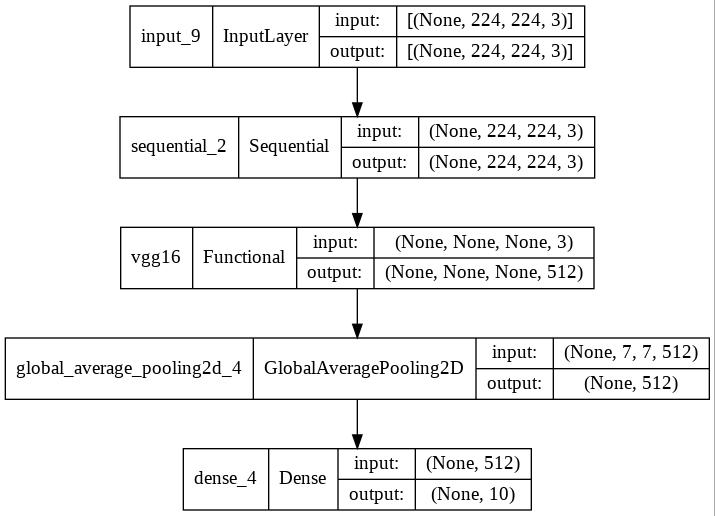

In [ ]:
dot_img_file = filepath_VGG16+'/structure.jpg'
tf.keras.utils.plot_model(VGG16_model, to_file=dot_img_file, show_shapes=True)

In [ ]:
history_vgg16 = VGG16_model.fit(my_training_batch_generator,
                   steps_per_epoch = int(44028 // (batch_size*5)),
                   epochs = 2,
                   verbose = 1, 
                   validation_data = my_validation_batch_generator,
                   validation_steps = 20,
                   callbacks=callbacks_list)

Epoch 1/2
275/275 [==============================] - ETA: 0s - loss: 2.0781 - accuracy: 0.2118
Epoch 00001: loss did not improve from 2.06312
275/275 [==============================] - 2377s 9s/step - loss: 2.0781 - accuracy: 0.2118 - val_loss: 2.0667 - val_accuracy: 0.2047
Epoch 2/2
275/275 [==============================] - ETA: 0s - loss: 2.0666 - accuracy: 0.2058
Epoch 00002: loss did not improve from 2.06312
275/275 [==============================] - 2211s 8s/step - loss: 2.0666 - accuracy: 0.2058 - val_loss: 2.0647 - val_accuracy: 0.2047


In [ ]:
def save_history(filename,a):
  try:
      array = np.load(filename)
      array = np.append(array,a)
      np.save(filename,array)
      print("Appended")
  except:
      np.save(filename,array)
      print("Saved")

In [ ]:
acc = np.array(history_vgg16.history['accuracy'])
save_history(filepath_VGG16+'/accuracy.npy',acc)

loss = np.array(history_vgg16.history['loss'])
save_history(filepath_VGG16+'/loss.npy',loss)

val_acc = np.array(history_vgg16.history['val_accuracy'])
save_history(filepath_VGG16+'/val_accuracy.npy',val_acc)

val_loss = np.array(history_vgg16.history['val_loss'])
save_history(filepath_VGG16+'/val_loss.npy',val_loss)

In [ ]:
acc = np.load(filepath_VGG16+'/accuracy.npy')
loss = np.load(filepath_VGG16+'/loss.npy')
val_acc = np.load(filepath_VGG16+'/val_accuracy.npy')
val_loss = np.load(filepath_VGG16+'/val_loss.npy')

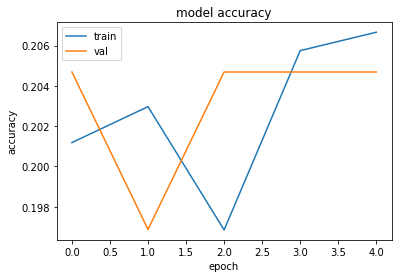

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

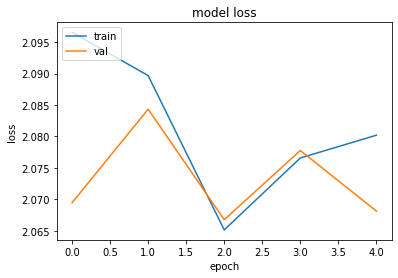

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Confusion Matrix

In [ ]:
 from sklearn.metrics import confusion_matrix
 import itertools
 def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma_r)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return figure


test_pred = VGG16_model.predict(my_test_batch_generator.,batch_size=64)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(my_test_batch_generator.labels, axis=1)
# Calculate the confusion matrix.
cm = confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=['Baroque','Minimalism','Symbolism','Realism','High_Renaissance','Cubism'])
plt.savefig(filepath_VGG16)

 ### IV) InceptionResNetV2 - Non-pretrained

In [ ]:
import numpy as np
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle

In [ ]:
filepath_inception = '/content/drive/MyDrive/wiki_art/InceptionResNetV2_non'

In [ ]:
# define the checkpoint
checkpoint = ModelCheckpoint(filepath_inception+'/checkpoints.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
inception_model = tf.keras.models.load_model(filepath_inception+'/checkpoints.h5')

In [ ]:
inception = tf.keras.applications.InceptionResNetV2(include_top=False, weights=None)
inception.trainable=True

Random Flip and Rotation image augmentations were implemented after the input layer 

In [ ]:
#Augmentation Layer
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
])

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = inception(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(6, activation="softmax")(x)
inception_model = keras.Model(inputs=inputs, outputs=outputs, name="inceptionv_model")

In [ ]:
inception_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.summary()

Model: "inceptionv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 global_average_pooling2d_6   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 6)                 9222      
                                                                 
Total params: 54,345,958
Trainable params: 54,285,

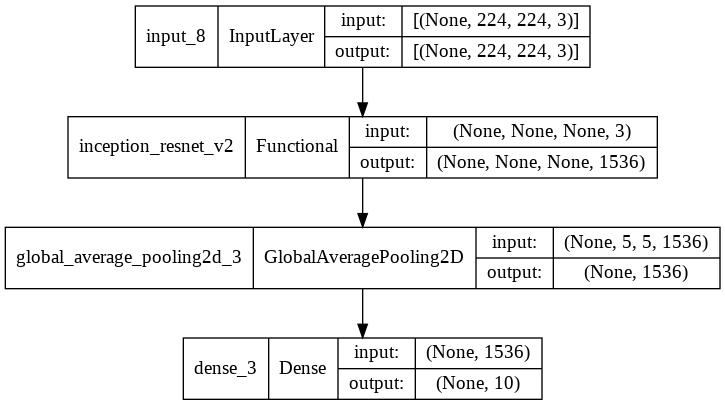

In [ ]:
dot_img_file =  '/content/drive/MyDrive/wiki_art/InceptionResNetV2_non'
tf.keras.utils.plot_model(inception_model, to_file=dot_img_file+'/structure.jpg', show_shapes=True)

In [ ]:
history_inception = inception_model.fit(my_training_batch_generator,
                   steps_per_epoch =  150,
                   epochs = 10,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   validation_steps =  19,
                   callbacks=callbacks_list)

Epoch 1/10
150/150 [==============================] - ETA: 0s - loss: 0.9412 - accuracy: 0.6365 
Epoch 00001: loss improved from 0.94682 to 0.94124, saving model to /content/drive/MyDrive/wiki_art/InceptionResNetV2_non/checkpoints.h5
150/150 [==============================] - 2293s 15s/step - loss: 0.9412 - accuracy: 0.6365 - val_loss: 0.9657 - val_accuracy: 0.6480
Epoch 2/10
150/150 [==============================] - ETA: 0s - loss: 0.9314 - accuracy: 0.6385 
Epoch 00002: loss improved from 0.94124 to 0.93137, saving model to /content/drive/MyDrive/wiki_art/InceptionResNetV2_non/checkpoints.h5
150/150 [==============================] - 2299s 15s/step - loss: 0.9314 - accuracy: 0.6385 - val_loss: 0.9501 - val_accuracy: 0.6365
Epoch 3/10
150/150 [==============================] - ETA: 0s - loss: 0.9367 - accuracy: 0.6357 
Epoch 00003: loss did not improve from 0.93137
150/150 [==============================] - 2256s 15s/step - loss: 0.9367 - accuracy: 0.6357 - val_loss: 1.0100 - val_acc

In [ ]:
def save_history(filename,a):
  try:
      array = np.load(filename)
      array = np.append(array,a)
      np.save(filename,array)
      print("Appended")
  except:
      np.save(filename,a)
      print("Saved")

In [ ]:
acc = np.array(history_inception.history['accuracy'])
save_history(filepath_inception+'/accuracy.npy',acc)

loss = np.array(history_inception.history['loss'])
save_history(filepath_inception+'/loss.npy',loss)

val_acc = np.array(history_inception.history['val_accuracy'])
save_history(filepath_inception+'/val_accuracy.npy',val_acc)

val_loss = np.array(history_inception.history['val_loss'])
save_history(filepath_inception+'/val_loss.npy',val_loss)

In [ ]:
acc = np.load(filepath_inception+'/accuracy.npy')
loss = np.load(filepath_inception+'/loss.npy')
val_acc = np.load(filepath_inception+'/val_accuracy.npy')
val_loss = np.load(filepath_inception+'/val_loss.npy')

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Confusion Matrix

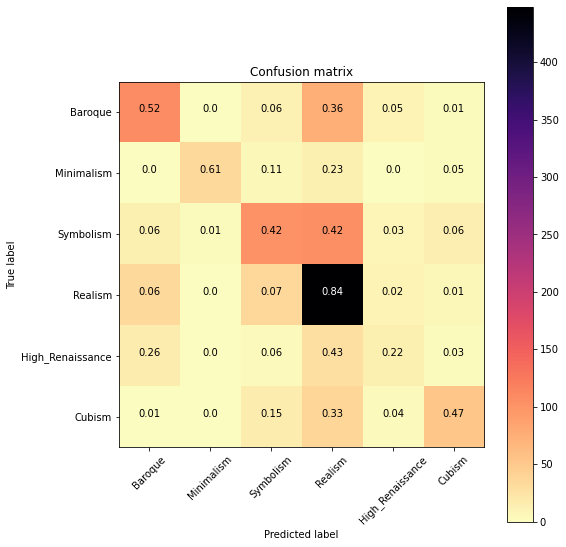

In [ ]:
 from sklearn.metrics import confusion_matrix
 import itertools
 def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma_r)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return figure


test_pred = inception_model.predict(my_test_batch_generator,batch_size=64)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(my_test_batch_generator.labels, axis=1)
# Calculate the confusion matrix.
cm = confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=['Baroque','Minimalism','Symbolism','Realism','High_Renaissance','Cubism'])
plt.savefig(filepath_inception)

### V) InceptionResNetV2 - Transfer Learning

In [ ]:
from numpy.testing import assert_allclose
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
import pickle

In [ ]:
filepath_inception = '/content/drive/MyDrive/wiki_art/InceptionResNetV2'
# define the checkpoint
checkpoint = ModelCheckpoint(filepath_inception+'/checkpoints.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
inception = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet')
inception.trainable=False

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
inception_model = tf.keras.models.load_model(filepath_inception+'/checkpoints.h5')

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
])

In [ ]:
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = inception(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(6, activation="softmax")(x)
inception_model = keras.Model(inputs=inputs, outputs=outputs, name="my_model")

In [ ]:
inception_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
inception_model.summary()

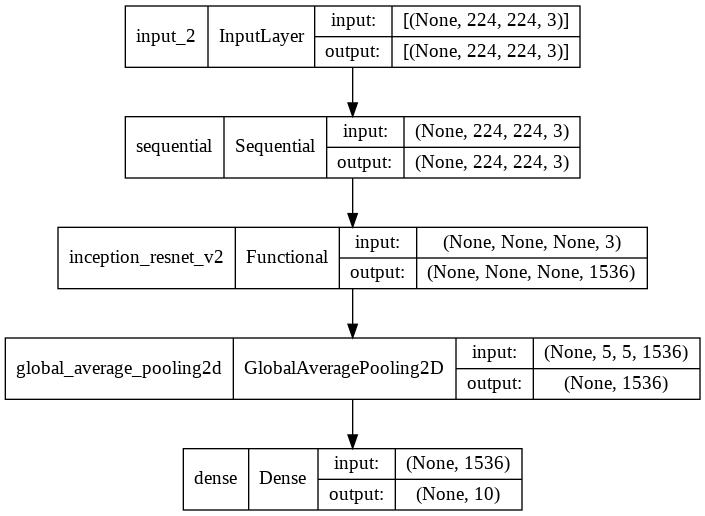

In [ ]:
dot_img_file =  '/content/drive/MyDrive/wiki_art/InceptionResNetV2'
tf.keras.utils.plot_model(inception_model, to_file=dot_img_file+'/structure.jpg', show_shapes=True)

In [ ]:
history_inception = inception_model.fit(my_training_batch_generator,
                   steps_per_epoch = 200,
                   epochs = 6,
                   verbose = 1,
                   validation_data = my_validation_batch_generator,
                   validation_steps = 20,
                   callbacks=callbacks_list)

Epoch 1/6
200/200 [==============================] - ETA: 0s - loss: 1.5031 - accuracy: 0.4429 
Epoch 00001: loss improved from inf to 1.50315, saving model to /content/drive/MyDrive/wiki_art/InceptionResNetV2/checkpoints.h5
200/200 [==============================] - 7473s 37s/step - loss: 1.5031 - accuracy: 0.4429 - val_loss: 1.4586 - val_accuracy: 0.4840
Epoch 2/6
200/200 [==============================] - ETA: 0s - loss: 1.4770 - accuracy: 0.4485 
Epoch 00002: loss improved from 1.50315 to 1.47697, saving model to /content/drive/MyDrive/wiki_art/InceptionResNetV2/checkpoints.h5
200/200 [==============================] - 4536s 23s/step - loss: 1.4770 - accuracy: 0.4485 - val_loss: 1.4276 - val_accuracy: 0.4808
Epoch 3/6
200/200 [==============================] - ETA: 0s - loss: 1.4780 - accuracy: 0.4432 
Epoch 00003: loss did not improve from 1.47697
200/200 [==============================] - 3408s 17s/step - loss: 1.4780 - accuracy: 0.4432 - val_loss: 1.4114 - val_accuracy: 0.4808
E

In [ ]:
def save_history(filename,a):
  try:
      array = np.load(filename)
      array = np.append(array,a)
      np.save(filename,array)
      print("Appended")
  except:
      np.save(filename,a)
      print("Saved")

In [ ]:
acc = np.array(history_inception.history['accuracy'])
save_history(filepath_inception+'/accuracy.npy',acc)

loss = np.array(history_inception.history['loss'])
save_history(filepath_inception+'/loss.npy',loss)

val_acc = np.array(history_inception.history['val_accuracy'])
save_history(filepath_inception+'/val_accuracy.npy',val_acc)

val_loss = np.array(history_inception.history['val_loss'])
save_history(filepath_inception+'/val_loss.npy',val_loss)

Saved
Saved
Saved
Saved


In [ ]:
acc = np.load(filepath_inception+'/accuracy.npy')
loss = np.load(filepath_inception+'/loss.npy')
val_acc = np.load(filepath_inception+'/val_accuracy.npy')
val_loss = np.load(filepath_inception+'/val_loss.npy')

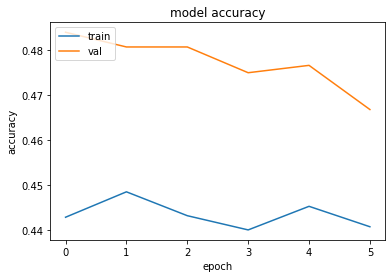

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

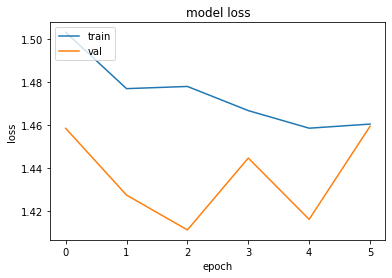

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Confusion Matrix

In [ ]:
 from sklearn.metrics import confusion_matrix
 import itertools
 def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.magma_r)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=45)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
  return figure


test_pred = inception_model.predict(my_test_batch_generator.,batch_size=64)
test_pred = np.argmax(test_pred, axis=1)
test_labels = np.argmax(my_test_batch_generator.labels, axis=1)
# Calculate the confusion matrix.
cm = confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.
figure = plot_confusion_matrix(cm, class_names=['Baroque','Minimalism','Symbolism','Realism','High_Renaissance','Cubism'])
plt.savefig(filepath_inception)

## Activation Maximization


In [ ]:
#Importing Required Library
!pip install tf-keras-vis tensorflow

#### Visualizing Dense layer using ActivationMaximization

In [ ]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

# 20 is the imagenet index corresponding to Ouzel.
score = CategoricalScore(0)

In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

activation_maximization = ActivationMaximization(inception_model,
                                                 model_modifier=replace2linear,
                                                 clone=True)

In [ ]:
%%time
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D

# Generate maximized activation
activations = activation_maximization(score,
                                      callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
f, ax = plt.subplots(figsize=(4, 4))
ax.imshow(activations[0])
ax.set_title('Baroque', fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

image_titles = ['Baroque','Minimalism', 'Symbolism','Realism','High_Renaissance','Cubism']
scores = CategoricalScore([0, 1, 2,3,4,5])

In [ ]:
# Create `seed_input` whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((6, 224, 224, 3), 0, 1)

In [ ]:
%%time

from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger

# Generate maximized activation
activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
f, ax = plt.subplots(nrows=1, ncols=6, figsize=(30, 20))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=18)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

### Visualizing Conv filters

In [ ]:
from tf_keras_vis.utils.scores import CategoricalScore

filter_numbers = [3, 4, 5]
scores = CategoricalScore(filter_numbers)

In [ ]:
# Define seed inputs whose shape is (samples, height, width, channels).

seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255)

200/200 [==============================] - 75s 374ms/step - Score: 37471200.0000 - TotalVariation2D: 28.2976 - Norm: 44.7576


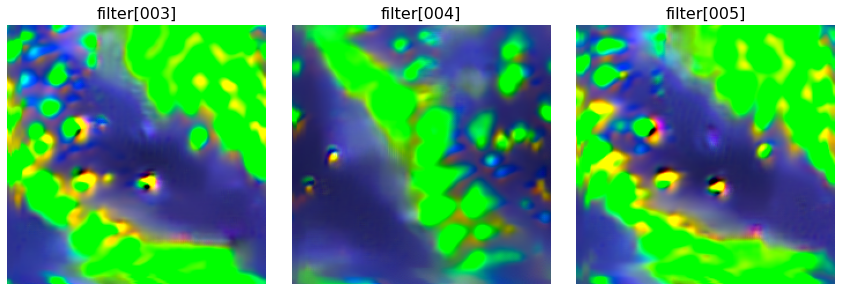

CPU times: user 1min 15s, sys: 650 ms, total: 1min 15s
Wall time: 1min 15s


In [ ]:
%%time

from tf_keras_vis.activation_maximization.callbacks import Progress

# Generate maximized activation
activations = activation_maximization(scores,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])

## Since v0.6.0, calling `astype()` is NOT necessary.
# activations = activations[0].astype(np.uint8)

# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, filter_number in enumerate(filter_numbers):
    ax[i].set_title('filter[{:03d}]'.format(filter_number), fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()